In [16]:
import enum, random

# Um Enum é um conjunto tipado de valores enumerados que deixa
# o código mais descritivo e legível

class Kid(enum.Enum):
    BOY = 0
    GIRL = 1

def random_kid() -> Kid:
    return random.choice([Kid.BOY, Kid.GIRL])

both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)

for _ in range(10000):
    younger = random_kid()

    older = random_kid()
    if older == Kid.GIRL:
        older_girl += 1
    if older == Kid.GIRL and younger == Kid.GIRL:
        both_girls += 1
    if older == Kid.GIRL or younger == Kid.GIRL:
        either_girl += 1

print("P(both | older): ", both_girls/older_girl)   # Probabilidade das duas crianças serem meninas dado que a mais velha é menina
print("P(both | either): ", both_girls/either_girl) # Probabilidade das duas crianças serem meninas dado que alguma delas é menina

P(both | older):  0.5007089325501317
P(both | either):  0.3311897106109325


In [17]:
def uniform_pdf(x: float) -> float:
    return 1 if 0 <= x < 1 else 0

def uniform_cdf(x: float) -> float:
    """Retorna a probabilidade de uma variável aleatória uniforme ser <= x"""
    if x < 0:   return 0        # a aleatória uniforme nunca é menor do que 0
    elif x < 1:     return x    # p.ex., P(X <= 0.4) = 0.4
    else:    return 1           # a aleatória uniforme sempre é menor do que 1

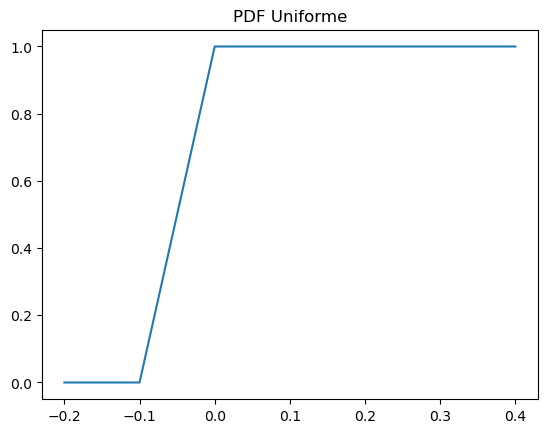

In [30]:
import matplotlib.pyplot as plt
xs = [x * 0.1 for x in range(-2, 5)]
plt.plot(xs, [uniform_pdf(x) for x in xs])
plt.title("PDF Uniforme")
plt.show()

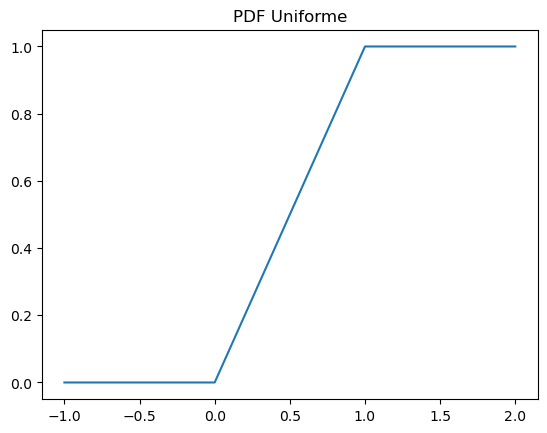

In [ ]:
import matplotlib.pyplot as plt
xs = [x * 0.5 for x in range(-2, 5)]
plt.plot(xs, [uniform_cdf(x) for x in xs])
plt.title("CDF Uniforme")
plt.show()

In [19]:
import math
SQRT_TWO_PI = math.sqrt(2 * math.pi)

def normal_pdf(x: float, mu: float = 0, sigma: float = 1) -> float:
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (SQRT_TWO_PI * sigma))

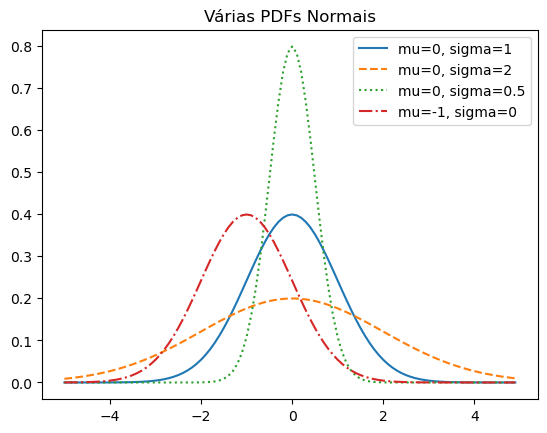

In [34]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs, [normal_pdf(x, sigma=1) for x in xs], '-', label='mu=0, sigma=1')
plt.plot(xs, [normal_pdf(x, sigma=2) for x in xs], '--', label='mu=0, sigma=2')
plt.plot(xs, [normal_pdf(x, sigma=0.5) for x in xs], ':', label='mu=0, sigma=0.5')
plt.plot(xs, [normal_pdf(x, mu=-1) for x in xs], '-.', label='mu=-1, sigma=0')

plt.legend()
plt.title("Várias PDFs Normais")
plt.show()

In [32]:
def normal_cdf(x: float, mu: float = 0, sigma: float = 1) -> float:
    return ( 1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

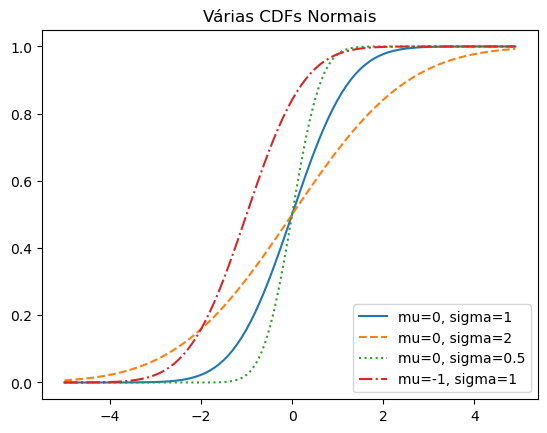

In [38]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs, [normal_cdf(x, sigma=1) for x in xs],'-', label='mu=0, sigma=1')
plt.plot(xs, [normal_cdf(x, sigma=2) for x in xs],'--', label='mu=0, sigma=2')
plt.plot(xs, [normal_cdf(x, sigma=0.5) for x in xs],':', label='mu=0, sigma=0.5')
plt.plot(xs, [normal_cdf(x, mu=-1, sigma=1) for x in xs],'-.', label='mu=-1, sigma=1')
plt.legend(loc=4)
plt.title("Várias CDFs Normais")
plt.show()

In [41]:
def inverse_normal_cdf(p: float, 
                       mu: float = 0,
                       sigma: float = 1,
                       tolerance: float = 0.00001) -> float:
    """Encontre o inverso aprocimado usando a pesquisa binária"""

    # se não for padrão, compute o padrão e rdimensione
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    
    low_z = -10.0                   # normal_cdf(-10) é (muito próxima de) 0
    hi_z = 10.0                     # normal_cdf(10) é (muito próxima de) 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) /2   # Considere o ponto médio
        mid_p = normal_cdf(mid_z)   # e o valor da CDF
        if mid_p < p:
            low_z = mid_z           # O ponto média é muito baixo, procure um maior
        else:
            hi_z = mid_z            # O ponto médio é muito alto, procure um menor
    return mid_z

In [46]:
def bernoulli_trial(p: float) -> int:
    """Retorna 1 com probabilidade p e 0 com probabilidade 1-p"""
    return 1 if random.random() < p else 0

def binomial(n: int, p: float) -> int:
    """Retorna a soma de n trials bernoulli(p)"""
    return sum(bernoulli_trial(p) for _ in range(n))

In [49]:
from collections import Counter

def binomial_histogram(p: float, n: int, num_points: int) -> None:
    """Seleciona pontos de um Binomial(n, p) e plota seu histograma"""
    data = [binomial(n, p) for _ in range(num_points)]

    # use um gráfico de barras para indicar as amostras de binomiais
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
            [v / num_points for v in histogram.values()],
             0.8,
             color='0.75')
    
    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))

    # use um gráfico de linhas para indicar a aproximação normal
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma) for i in xs]
    plt.plot(xs,ys)
    plt.title("Distribuição Binomial vs. Aproximação Normal")
    plt.show()


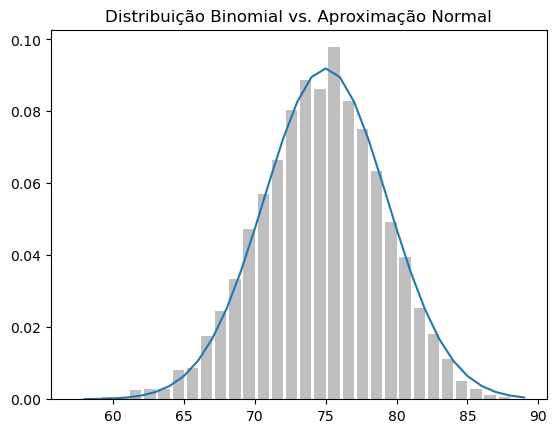

In [50]:
binomial_histogram(0.75, 100, 10000)